# EE 511 Assignment 4 - PartI
University of Washington<br>
Code by John Ragland and Doruk Arisoy<br>
Winter 2021

In [6]:
# Suppress Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import tools
import loadgalaxy
import matplotlib.pyplot as plt
import torch
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.decomposition import PCA

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the data

In [3]:
imgs_train = loadgalaxy.LoadDir('galaxy/train')
imgs_val = loadgalaxy.LoadDir('galaxy/val')
imgs_test = loadgalaxy.LoadDir('galaxy/test')
print(imgs_train.shape)
print(imgs_val.shape)
print(imgs_test.shape)

(40872, 20, 20)
(10382, 20, 20)
(10324, 20, 20)


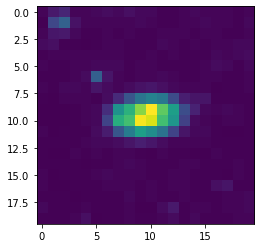

In [19]:
imgs_train = imgs_train.reshape(40872, 400)
imgs_val = imgs_val.reshape(10382, 400)
imgs_test = imgs_test.reshape(10324, 400)
imgplot = plt.imshow(imgs_train[0].reshape(20, 20))
plt.show()

## Play around with PCA

In [30]:
pca = PCA(n_components=25)
converted_val = pca.fit_transform(imgs_val)
inverted_val = pca.inverse_transform(converted_val)
converted_test = pca.fit_transform(imgs_test)
inverted_test = pca.inverse_transform(converted_test)

print('PCA MSE on validation: %.2f' % (np.square(imgs_val - inverted_val)).mean(axis=1).mean(axis=0))
print('PCA MSE on testing: %.2f' % (np.square(imgs_test - inverted_test)).mean(axis=1).mean(axis=0))

PCA MSE on validation: 37.38
PCA MSE on testing: 37.30


## Train an autoencoder